In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,recall_score,precision_score,roc_auc_score,roc_curve,confusion_matrix,classification_report,f1_score,auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
docs = pd.read_table("/Volumes/MyFiles/MachineLearning/upgrad/LiveCourse/Naive Bayes/SMSSpamCollection",names=['class','sms'])

In [3]:
docs.head()

,class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Checking the Null values is the dataset

In [4]:
docs['sms'].isnull().sum()

0

In [5]:
docs['class'].isnull().sum()

0

In [6]:
#Checking the Percentage of distribution of two classes SPAM or HAM 

# SPAM Percentage
print("SPAM CLASS PERCENTAGE",round(100*len(docs[docs['class']=='spam'])/len(docs.index),2))

#HAM Percentage
print("HAM CLASS PERCENTAGE",round(100*len(docs[docs['class']=='ham'])/len(docs.index),2))

SPAM CLASS PERCENTAGE 13.41
HAM CLASS PERCENTAGE 86.59


In [7]:
#Categorical Encoding of SPAM and HAM 

docs['class'] = docs['class'].map({'spam':1,'ham':0})

docs['sms'] = docs['sms'].apply(lambda x : x.lower())

In [8]:
#Spliting data to xtrain,ytrain,xtest,ytest

X = docs[['sms']]
Y = docs[['class']]

xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=.3,random_state=42)

print("xtrain->shape",xtrain.shape)
print("ytrain->shape",ytrain.shape)
print("xtest->shape",xtest.shape)
print("ytest->shape",ytest.shape)

xtrain->shape (3900, 1)
ytrain->shape (3900, 1)
xtest->shape (1672, 1)
ytest->shape (1672, 1)


In [9]:
#Creating the Document Matrix using the CountVectorizer

tfidvec = TfidfVectorizer(stop_words='english')

tfidvec.fit(xtrain['sms'])

#tfidvec.vocabulary_

TfidfVectorizer(stop_words='english')

In [10]:
#print(tfidvec.get_feature_names())

In [11]:
tfidvec.idf_

# The idf_ values present in cross documents will be minimum

array([7.32307806, 6.22446577, 8.57584103, ..., 8.57584103, 8.57584103,
       8.57584103])

In [12]:
# vocab size

len(tfidvec.vocabulary_.keys())

7004

In [13]:
xtrain_transformed = tfidvec.transform(xtrain['sms']) # to compress the sparse matrix
xtest_transformed = tfidvec.transform(xtest['sms']) # to compress the sparse matrix

In [14]:
pd.DataFrame(xtrain_transformed.toarray(),columns=tfidvec.get_feature_names())

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,02,0207,...,zed,zeros,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
pd.DataFrame(xtest_transformed.toarray(),columns=tfidvec.get_feature_names())

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,02,0207,...,zed,zeros,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1668,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1669,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1670,0.0,0.544435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
type(xtrain_transformed)

scipy.sparse.csr.csr_matrix

In [17]:
type(xtest_transformed)

scipy.sparse.csr.csr_matrix

In [18]:
print(xtrain_transformed)

  (0, 6908)	0.42057032296489166
  (0, 5026)	0.3425956765507876
  (0, 3635)	0.31674844532481095
  (0, 3630)	0.33392519134134463
  (0, 2222)	0.4595576461719437
  (0, 944)	0.35285068394560465
  (0, 260)	0.3977642008852706
  (1, 6400)	0.6880385669683886
  (1, 5088)	0.564752315585174
  (1, 4330)	0.4556948018194525
  (2, 5910)	0.4598907748288949
  (2, 5321)	0.407962240134966
  (2, 1883)	0.5577039025555312
  (2, 1558)	0.5577039025555312
  (3, 6158)	0.3946472175836325
  (3, 5393)	0.39750737599148894
  (3, 2033)	0.5517950786382567
  (3, 1763)	0.45501827241822324
  (3, 890)	0.41799763473253515
  (4, 6865)	0.44283976592107704
  (4, 5676)	0.6128580677760654
  (4, 3169)	0.517613431846439
  (4, 2865)	0.4004675588020898
  (5, 6370)	0.3834923635990344
  (5, 6195)	0.27093588360978976
  :	:
  (3895, 6836)	0.4724310616139888
  (3895, 3734)	0.4724310616139888
  (3895, 3086)	0.26272736081331977
  (3895, 2892)	0.2286724629283105
  (3895, 2278)	0.4500945571447008
  (3895, 2081)	0.26990881063254835
  (3896, 5

In [19]:
xtest_transformed.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.54443518, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

# Model Building

In [20]:


bnb = BernoulliNB()

model = bnb.fit(xtrain_transformed,ytrain)

ytest_pred = model.predict(xtest_transformed)

ytest_probab = model.predict_proba(xtest_transformed)

ytest_probab

model.get_params()

ytest_probab

array([[9.99999991e-01, 9.01974437e-09],
       [9.99999500e-01, 4.99970679e-07],
       [1.00000000e+00, 7.02036507e-11],
       ...,
       [1.00000000e+00, 8.20250030e-13],
       [2.80899781e-07, 9.99999719e-01],
       [1.00000000e+00, 2.25360420e-12]])

# Model Evaluation

In [21]:
#accuracy score 

accuracy_score(ytest,ytest_pred)

0.9736842105263158

In [22]:
# Confusion Matrix

# Here the positive case ham is 0 considered negative i.e TN will be the case for ham

# Our objective is make sure none of the ham mail is considered to be spam

# Our goal is to maximize the specificity to make sure we should get less false positive i.e false spam

confusion_matrix(ytest,ytest_pred)

array([[1447,    1],
       [  43,  181]])

In [23]:
confusion = confusion_matrix(ytest,ytest_pred)

TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]
TP = confusion[1,1]

senstivity = TP/float(TP+FN)

print("senstivity or recall",senstivity)

specificity = TN/float(TN+FP)

print("specificity",specificity)

precision = TP/float(TP+FP)

print("precision",precision)

print("F1-Score",f1_score(ytest,ytest_pred))
#print("Precision score",precision_score(ytest,ytest_pred))
#print("Recall Score",recall_score(ytest,ytest_pred))

senstivity or recall 0.8080357142857143
specificity 0.9993093922651933
precision 0.9945054945054945
F1-Score 0.8916256157635467


In [24]:
#ROC_AUC_CURVE

# from the test set and the predicted probabilities for the 1 class. 
# The function returns the false positive rates for each threshold, 
# true positive rates for each threshold and thresholds

fpr,tpr,threshold = roc_curve(ytest,ytest_probab[:,1])

auc_score = roc_auc_score(ytest,ytest_probab[:,1])

auc = auc(fpr,tpr)

# print(fpr)
# print(tpr)
# print(threshold)

print("auc score",auc_score)

print("auc",auc)

auc score 0.9920117649960536
auc 0.9920117649960536


In [25]:
pd.DataFrame({'FPR':fpr,'TPR':tpr,'Threshold':threshold})

,FPR,TPR,Threshold
0,0.000000,0.000000,2.000000e+00
1,0.000000,0.227679,1.000000e+00
2,0.000000,0.245536,1.000000e+00
3,0.000000,0.254464,1.000000e+00
4,0.000000,0.267857,1.000000e+00
...,...,...,...
148,0.883978,1.000000,1.418540e-12
149,0.885359,1.000000,1.410074e-12
150,0.938536,1.000000,2.612578e-13
151,0.946133,1.000000,2.555640e-13


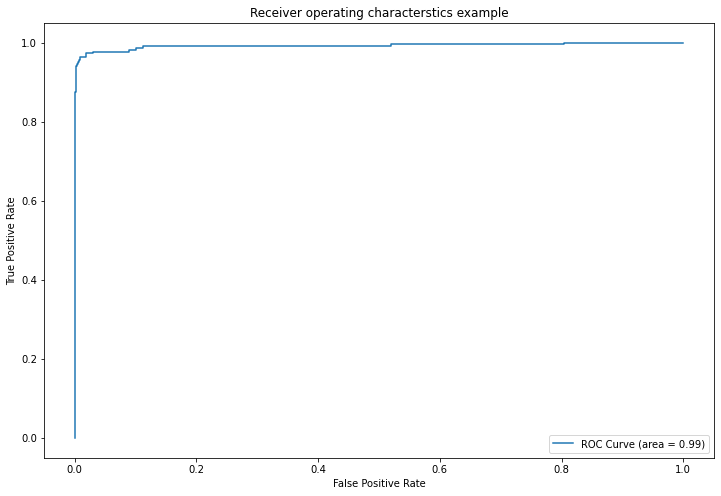

In [26]:
#ROC AUC GRAPH

plt.figure(figsize=(12,8))
plt.plot(fpr,tpr, label='ROC Curve (area = %0.02f)' % auc_score)


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characterstics example')
plt.legend(loc="lower right")
plt.show()

In [27]:
#Predict Random Data

xtest_transformed.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.54443518, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [28]:
random_text = ["can you share me the acc detail to use your credit card and win free reward upto 10000 and will fix a date on sunday win CASH! From 100 to 20,000 pound"]
xmanual_test = pd.DataFrame({'sms':random_text})

xmanual_transformed = tfidvec.transform(xmanual_test['sms']) # to compress the sparse matrix

pred = model.predict(xmanual_transformed)

if pred[0] == 0:
    print('HAM')
else:
    print('SPAM')

SPAM
